In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
simulator = AerSimulator()

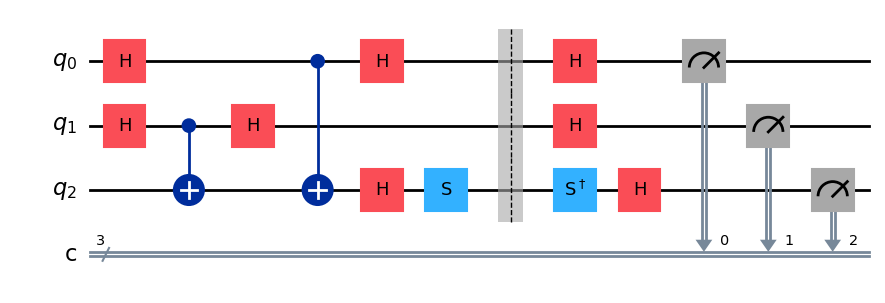

In [3]:
#medida XXY
circ = QuantumCircuit(3,3)
circ.h(1)
circ.cx(1, 2)
circ.h(1)
circ.h(0)
circ.cx(0,2)
circ.h(0)
circ.h(2)
circ.s(2)
circ.barrier()
circ.h(0)
circ.h(1)
circ.sdg(2)
circ.h(2)
circ.measure([0,1,2], [0,1,2])
circ.draw("mpl")



In [34]:
import mthree

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
mit = mthree.M3Mitigation(simulator)
mit.cals_from_system()
raw1 = simulator.run(circ, shots=4000).result().get_counts()
quasi1 = mit.apply_correction(raw1, [0,1,2], return_mitigation_overhead=True)

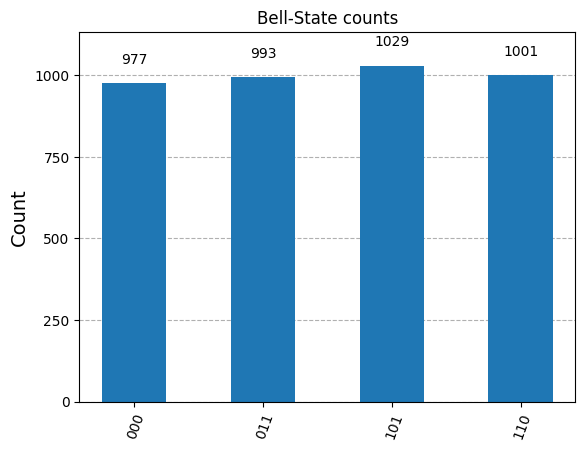

In [35]:
plot_histogram(raw1, title='Bell-State counts')

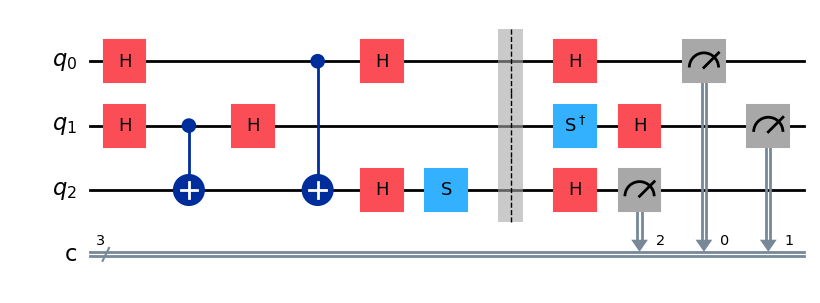

In [5]:
circ1 = QuantumCircuit(3,3)
circ1.h(1)
circ1.cx(1, 2)
circ1.h(1)
circ1.h(0)
circ1.cx(0,2)
circ1.h(0)
circ1.h(2)
circ1.s(2)
circ1.barrier()
circ1.h(0)
circ1.sdg(1)
circ1.h(1)
circ1.h(2)
circ1.measure([0,1,2], [0,1,2])
circ1.draw("mpl")

In [42]:
# Transpile for simulator
circ1 = transpile(circ1, simulator)


# Run and get counts
mit.cals_from_system()
raw2 = simulator.run(circ1, shots=4000).result().get_counts()
quasi2 = mit.apply_correction(raw2, [0,1,2], return_mitigation_overhead=True)

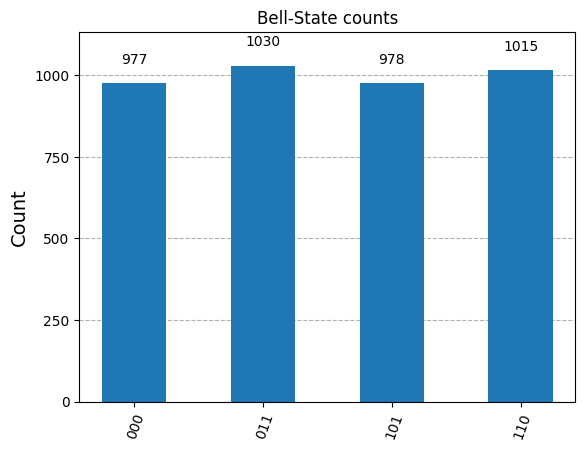

In [43]:
plot_histogram(raw2, title='Bell-State counts')

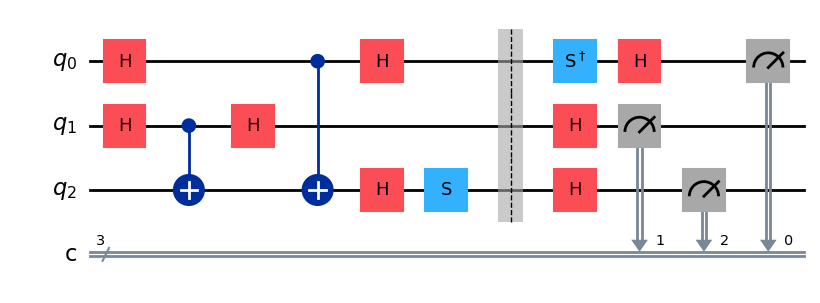

In [7]:
circ2 = QuantumCircuit(3,3)
circ2.h(1)
circ2.cx(1, 2)
circ2.h(1)
circ2.h(0)
circ2.cx(0,2)
circ2.h(0)
circ2.h(2)
circ2.s(2)
circ2.barrier()
circ2.sdg(0)
circ2.h(0)
circ2.h(1)
circ2.h(2)
circ2.measure([0,1,2], [0,1,2])
circ2.draw("mpl")

In [44]:
# Transpile for simulator
circ2 = transpile(circ2, simulator)


# Run and get counts
mit.cals_from_system()
raw3 = simulator.run(circ2, shots=4000).result().get_counts()
quasi3 = mit.apply_correction(raw3, [0,1,2], return_mitigation_overhead=True)

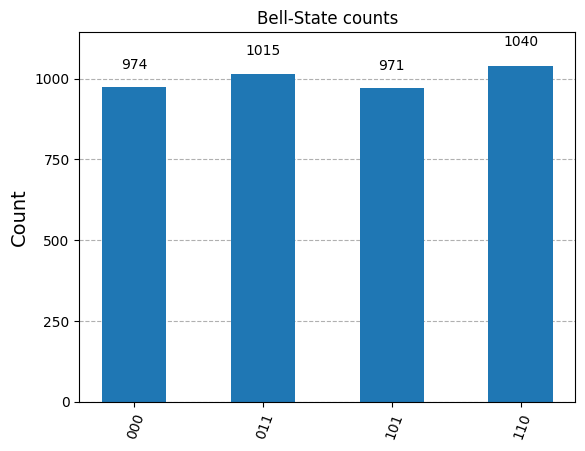

In [45]:
plot_histogram(raw3, title='Bell-State counts')

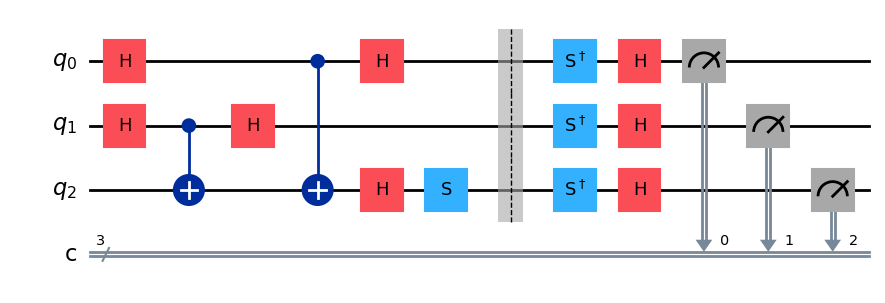

In [9]:
circ3 = QuantumCircuit(3,3)
circ3.h(1)
circ3.cx(1, 2)
circ3.h(1)
circ3.h(0)
circ3.cx(0,2)
circ3.h(0)
circ3.h(2)
circ3.s(2)
circ3.barrier()
circ3.sdg(0)
circ3.h(0)
circ3.sdg(1)
circ3.h(1)
circ3.sdg(2)
circ3.h(2)
circ3.measure([0,1,2], [0,1,2])
circ3.draw("mpl")

In [46]:

# Transpile for simulator
circ3 = transpile(circ3, simulator)

# Run and get counts
mit.cals_from_system()
raw4 = simulator.run(circ3, shots=4000).result().get_counts()
quasi4 = mit.apply_correction(raw4, [0,1,2], return_mitigation_overhead=True)

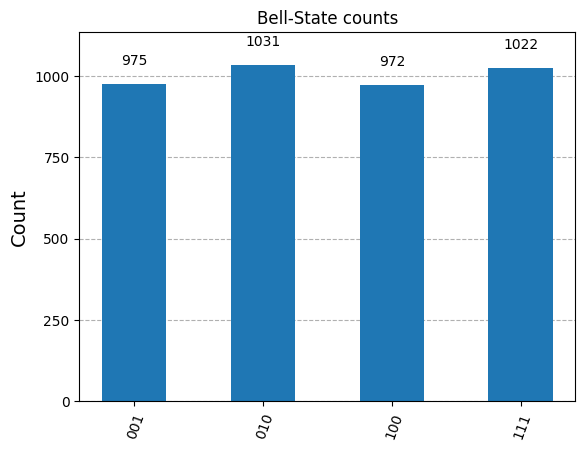

In [47]:
plot_histogram(raw4, title='Bell-State counts')

In [48]:
quasi1.expval() + quasi2.expval()+ quasi3.expval() - quasi4.expval()

4.0

In [18]:
import numpy as np
from qiskit import *
from qiskit_ibm_runtime.fake_provider import FakeAthens
import mthree

backend = FakeAthens()


trans_ghz1 = transpile(circ, backend)
trans_ghz2 = transpile(circ1, backend)
trans_ghz3 = transpile(circ2, backend)
trans_ghz4 = transpile(circ3, backend)


raw1 = backend.run(trans_ghz1, shots=4000).result().get_counts()
raw2 = backend.run(trans_ghz2, shots=4000).result().get_counts()
raw3 = backend.run(trans_ghz3, shots=4000).result().get_counts()
raw4 = backend.run(trans_ghz4, shots=4000).result().get_counts()

mit = mthree.M3Mitigation(backend)
mit.cals_from_system()

quasi1 = mit.apply_correction(raw1, [0,1,2], return_mitigation_overhead=True)
quasi2 = mit.apply_correction(raw2, [0,1,2], return_mitigation_overhead=True)
quasi3 = mit.apply_correction(raw3, [0,1,2], return_mitigation_overhead=True)
quasi4 = mit.apply_correction(raw4, [0,1,2], return_mitigation_overhead=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_8896\1188792603.py:6: DeprecationWarning: V1 fake backends are deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use V2 fake backends instead.
  backend = FakeAthens()


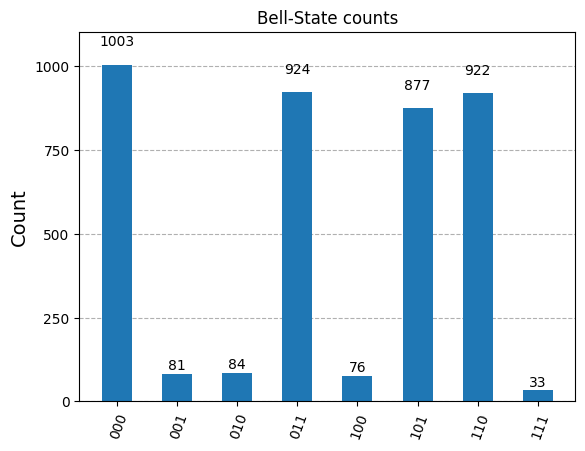

In [25]:


# Run and get counts

plot_histogram(raw1, title='Bell-State counts')

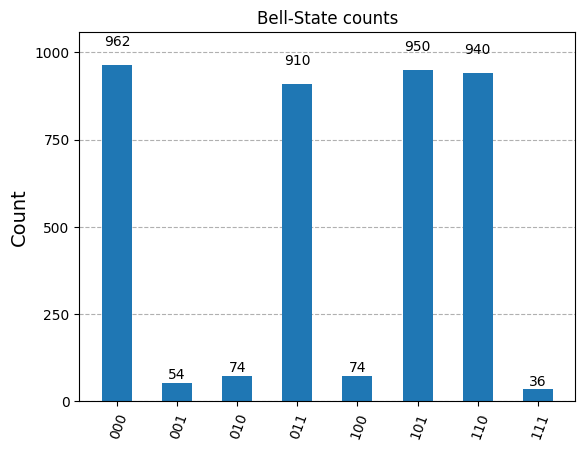

In [26]:
plot_histogram(raw2, title='Bell-State counts')

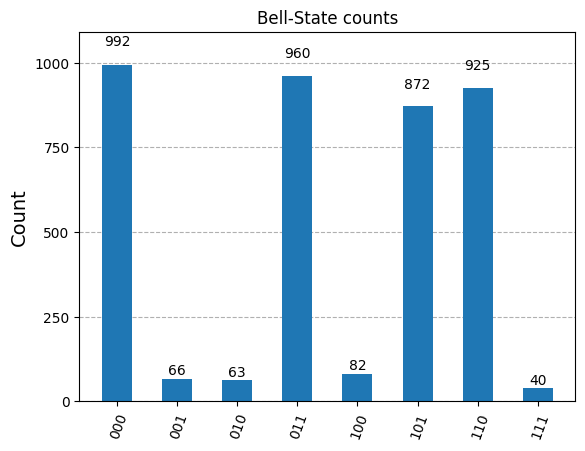

In [27]:
plot_histogram(raw3, title='Bell-State counts')

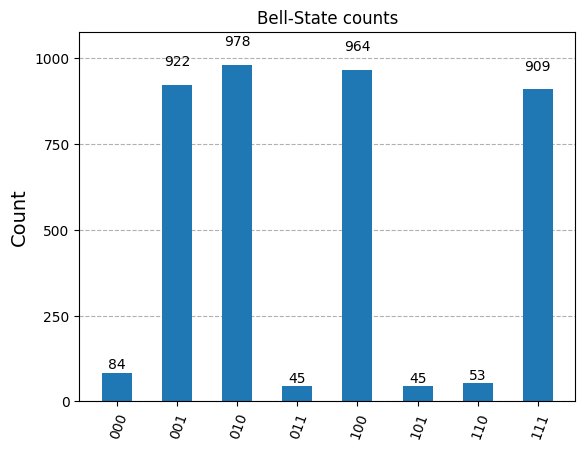

In [28]:
plot_histogram(raw4, title='Bell-State counts')

In [20]:
print('GHZ1:', quasi1.expval())
print('GHZ2:', quasi2.expval())
print('GHZ3:', quasi3.expval())
print('GHZ4:', quasi4.expval())

GHZ1: 0.9513773849776421
GHZ2: 0.9720473304665675
GHZ3: 0.9640829468439515
GHZ4: -0.9778214613569618


In [23]:
quasi1.expval() + quasi2.expval()+ quasi3.expval() - quasi4.expval()

3.8653291236451226

In [50]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel= "ibm_quantum",
    token="your token")

In [51]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [56]:
backend = service.backend('ibm_brisbane')

In [58]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler


pm = generate_preset_pass_manager(backend=backend,
                                  
                                  optimization_level=3)
circ_isa = pm.run(circ)
circ_isa1 = pm.run(circ1)
circ_isa2 = pm.run(circ2)
circ_isa4 = pm.run(circ3)
sampler = Sampler(backend=backend)
job = sampler.run([circ_isa,circ_isa1,circ_isa2,circ_isa4], shots=20000)

pub_result1 = job.result()[0]
pub_result2 = job.result()[1]
pub_result3 = job.result()[2]
pub_result4 = job.result()[3]


C:\Users\PC\AppData\Local\Temp\ipykernel_8896\865216117.py:12: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


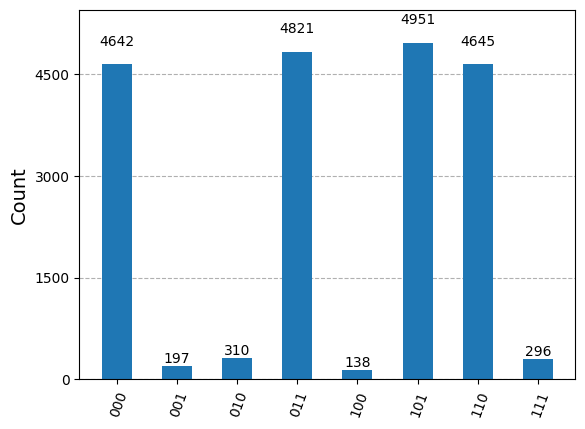

In [65]:
plot_histogram(pub_result1.data.c.get_counts())

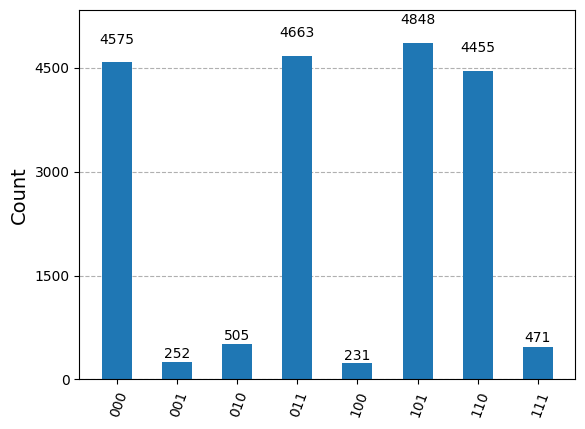

In [66]:
plot_histogram(pub_result2.data.c.get_counts())

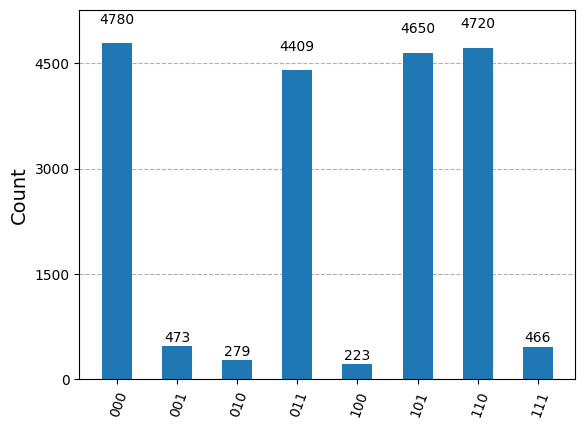

In [67]:
plot_histogram(pub_result3.data.c.get_counts())

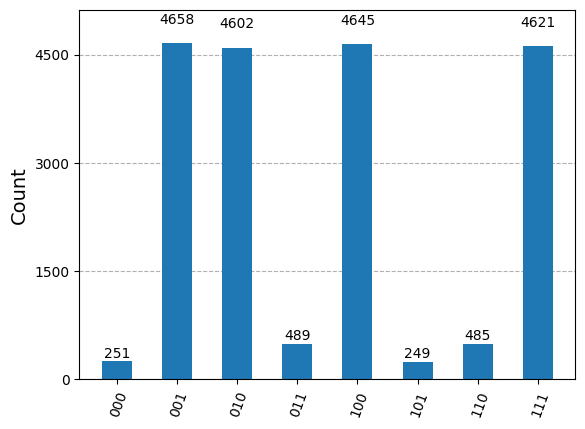

In [68]:
plot_histogram(pub_result4.data.c.get_counts())